<h6>Fall 2021 - CPSC 483-02<br>
Project 2 - <br>
Sean Javiya <br>
Jake Wong <br>
</h6>
In Project 1 - Anomaly Detection, we were given a dataset containing a list of students and their Zoom attendance over a 5 week course.<br>We performed various statistical tests on the data, in order to develop a function that will parse the provided dataset and output a list of students who were tardy or under-attended.<br>We developed two functions using different statistical methods of detecting anomalies in the dataset.<br>We conducted an analysis on the results and determined which function was more appropriate for the given dataset.
^rewrite

In [1]:
#import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

xvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=(0,1))
yvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=2)
randomnumber = np.random.randint(0, yvalues.size, size= int(yvalues.size/10))
print ("We are given ", yvalues.size, " rows of x_1, x_2, and y values.")
xtrain = xvalues
ytrain = yvalues
xtest1 = []
xtest2 = []
ytest = [] #10%
randomnumber[::-1].sort()
for n in randomnumber:
    xtest1.append(xvalues[n, 0])
    xtest2.append(xvalues[n, 1])
    ytest.append(yvalues[n])
    xtrain = np.delete(xtrain, n, 0)
    ytrain = np.delete(ytrain, n, 0)
xtest = np.stack((xtest1, xtest2), axis= -1)
ytest = np.asarray(ytest)
print ("We take ", ytrain.size, " rows for training.")
print ("The remaning ", ytest.size, " rows of x_1, x_2, and y_2 values are set aside for testing.")

We are given  1000  rows of x_1, x_2, and y values.
We take  900  rows for training.
The remaning  100  rows of x_1, x_2, and y_2 values are set aside for testing.


In [2]:
print (xtrain)
Xtrain = np.hstack((np.ones_like(xtrain), xtrain))
Xtrain = np.delete(Xtrain, 0, 1)
weights = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(ytrain)
print ("\nIn our linear model, our y-intercept and coefficients are: ", weights)


[[-0.59828843  0.46192254]
 [-1.74575782 -1.41239652]
 [-1.16639696 -0.06900688]
 ...
 [ 0.60744114 -2.60559204]
 [ 0.04306784 -3.45458992]
 [ 0.06279166 -0.0365992 ]]

In our linear model, our y-intercept and coefficients are:  [0.7007674  0.03199887 0.00822513]


y = b + mx<br>
y = w0  + w1 x1 + w2 x2<br>
given x1 x2 and y<br><br>
y = (w0 w1 w2) dotproduct (1 x1 x2)<br><br>
y dotproduct inverse of transpose of (1 x1 x2) = (w0 w1 w2)<br><br>

y = weights dot xtrain

In [3]:
predicteddata = []
predictrange = ytrain.size
predictrange -= 1
while predictrange >= 0:
    prediction = weights[0] * Xtrain[predictrange,0] + weights[1] * Xtrain[predictrange, 1] + weights[2] * Xtrain[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
linearsquaredloss = 0
while predictrange >= 0:
    linearsquaredloss += (ytrain[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
linearsquaredloss = linearsquaredloss / ytrain.size
print ("The MSE, or average squared loss, of our linear model is ", linearsquaredloss)

The MSE, or average squared loss, of our linear model is  8.55344063320447


In [4]:
Xquadratic = np.hstack((np.ones_like(xtrain), xtrain, xtrain**2))
Xquadratic = np.delete(Xquadratic, 0, 1)
quadweights = np.linalg.inv(Xquadratic.transpose().dot(Xquadratic)).dot(Xquadratic.transpose()).dot(ytrain)
print("In our quadratic model, our y-intercept and coefficients are: \n", quadweights, "\n")
quadpredicteddata = []
predictrange = ytrain.size
predictrange -= 1
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadratic[predictrange, 0] + quadweights[1] * Xquadratic[predictrange, 1] + quadweights[2] *Xquadratic[predictrange, 2] + quadweights[3] * Xquadratic[predictrange, 3] + quadweights[4] * Xquadratic[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
quadsquaredloss = 0
while predictrange >= 0:
    quadsquaredloss += (ytrain[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
quadsquaredloss = quadsquaredloss / ytrain.size
print ("The MSE of our quadratic model is ", quadsquaredloss)

In our quadratic model, our y-intercept and coefficients are: 
 [0.54869614 0.02899071 0.01377115 0.04060605 0.01044415] 

The MSE of our quadratic model is  8.60610453129237


equation is w0* 1 + w1 x1 + w2x2 + w3 x1^2 + w4 x2^2

In [5]:
Xtest = np.hstack((np.ones_like(xtest), xtest))
Xtest = np.delete(Xtest, 0, 1)
predicteddata = []
predictrange = ytest.size
predictrange -= 1
while predictrange >= 0:
    prediction = weights[0] * Xtest[predictrange,0] + weights[1] * Xtest[predictrange, 1] + weights[2] * Xtest[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
lintest_squaredloss = 0
while predictrange >= 0:
    lintest_squaredloss += (ytest[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
lintest_squaredloss = lintest_squaredloss / ytest.size
print ("When our linear model was applied to our test data, the MSE was ", lintest_squaredloss)

When our linear model was applied to our test data, the MSE was  8.597828009252712


In [6]:
Xquadtest = np.hstack((np.ones_like(xtest), xtest, xtest**2))
Xquadtest = np.delete(Xquadtest, 0, 1)

quadpredicteddata = []
predictrange = ytest.size
predictrange -= 1
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadtest[predictrange, 0] + quadweights[1] * Xquadtest[predictrange, 1] + quadweights[2] * Xquadtest[predictrange, 2] + quadweights[3] * Xquadtest[predictrange, 3] + quadweights[4] * Xquadtest[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
    
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
quadtest_squaredloss = 0
while predictrange >= 0:
    quadtest_squaredloss += (ytest[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
quadtest_squaredloss = quadtest_squaredloss / ytest.size
print ("When our quadratic model was applied to our test data, the MSE was ", quadtest_squaredloss)


When our quadratic model was applied to our test data, the MSE was  8.628046593568047


about the same

MSE by Model Order


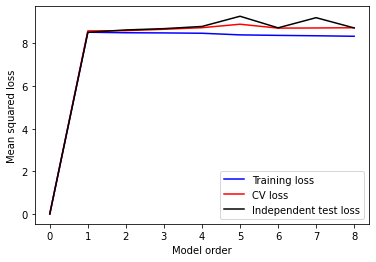

In [7]:
max_order = 8
K = 5
cv_loss = np.zeros((K,max_order+1))
ind_loss = np.zeros((K,max_order+1))
train_loss = np.zeros((K,max_order+1))
x_train = xtrain
x_ktest = xtest 

for k in range(max_order+1)[1:]:
    for fold in range(K):
        y_fold = ytrain[fold*180 : (fold+1)*180]
        y_train = np.delete(ytrain, (range(fold*180, (fold+1)*180)))
        
        X_fold = x_train[fold*180 : (fold+1)*180, : ]
        X_fold = np.hstack((np.ones_like(y_fold)[:, np.newaxis], X_fold))
        
        X_train = np.delete(x_train, (range(fold*180, (fold+1)*180)), 0)
        X_train = np.hstack((np.ones_like(y_train)[:, np.newaxis], X_train))
        
        x_test = np.hstack((np.ones_like(ytest)[:, np.newaxis], x_ktest))
        
        wfold = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,y_train))
        
        indpred = np.dot(x_test,wfold)
        foldpred = np.dot(X_fold,wfold)
        trainpred = np.dot(X_train,wfold)
        
        cv_loss[fold,k] = ((foldpred - y_fold)**2).mean()
        ind_loss[fold,k] = ((indpred - ytest)**2).mean()
        train_loss[fold,k] = ((trainpred - y_train)**2).mean()  
        
    x_train = np.hstack((x_train,xtrain**(k+1)))
    x_ktest = np.hstack((x_ktest,xtest**(k+1)))    

order = np.arange(max_order+1)
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')
print("MSE by Model Order")


around 7, it starts to overfit
(1, x1, x2, ... x1^7, x2^7) dot product with wfold


In [8]:
print("When our 6th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:")
print (ind_loss[:,6].mean())
print
print("\nWhen our 5th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:")
print (ind_loss[:,5].mean())

print("\nWhen our 7th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:")
print (ind_loss[:,7].mean())

When our 6th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:
8.733609536409393

When our 5th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:
9.278213948255834

When our 7th order polynomial is applied to the test data, the average MSE across our 5 fold cross validation is:
9.210644825459003


is the test MSE for polynomial order 7

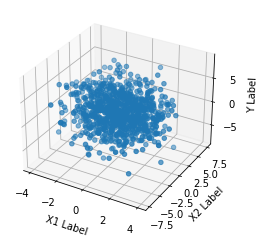

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xtrain[:,0], xtrain[:,1], ytrain)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()

I notice that it looks pretty


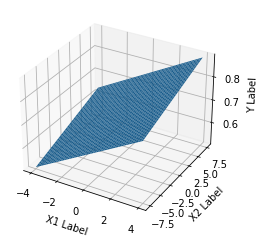

In [10]:
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(weights[0]+weights[1]*np.ravel(X)+weights[2]*np.ravel(Y))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
plt.show()

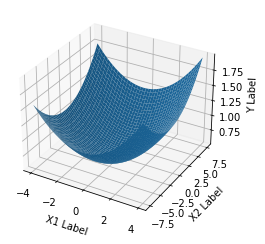

In [11]:
def quadEqu(x,y):
    return quadweights[0] + quadweights[1] * x + quadweights[2] * y + quadweights[3] * x**2 + quadweights[4] * y**2
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
x=np.arange(-4,4,0.05)
y=np.arange(-7.5,7.5,0.05)
X,Y=np.meshgrid(x,y)
z=np.array(quadEqu(np.ravel(X),np.ravel(Y)))
Z=z.reshape(X.shape)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
plt.show()